In [1]:
import numpy as np
import pandas as pd
import pybrain
from matplotlib import pylab as plt

from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets            import ClassificationDataSet
from pybrain.structure.modules   import SoftmaxLayer

%matplotlib inline

## Red y datos (XOR)

Incluimos ruido en los puntos para que salga mejor el resultado. Utilizamos 4 neuronas ocultas, aparte de las 2 de entrada y la de salida.

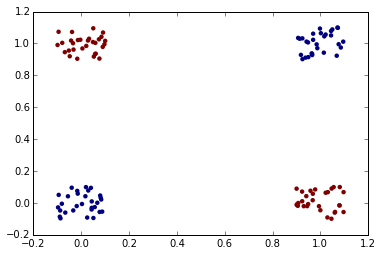

In [11]:
net = buildNetwork(2, 10, 1, bias=True)
ds = SupervisedDataSet(2,1)
esc = 0.1
def ruido(escala=esc):
    return np.random.random()*escala*2 - escala
for i in range(30):
    ds.addSample((0+ruido(), 0+ruido()), (0,))
    ds.addSample((0+ruido(), 1+ruido()), (1,))
    ds.addSample((1+ruido(), 0+ruido()), (1,))
    ds.addSample((1+ruido(), 1+ruido()), (0,))

plt.scatter(ds['input'][:,0], ds['input'][:,1], c=ds['target'], linewidths=0)


### Entrenamiento

Encontramos el número de iteraciones de entrenamiento al tanteo, viendo cuándo se veía bien el resultado. Como tarda bastante en entrenar, intentamos que fueran las menos posibles que dieran un buen resultado. No utilizamos validación formal.

In [12]:
trainer = BackpropTrainer(net, ds)
err_info = trainer.trainEpochs(300)

### Graficamos salida (suave)

En lugar de truncar los valores para predecir, graficamos las probabilidades estimadas (ie. directo la salida de la red).

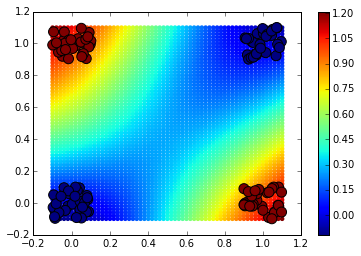

In [13]:
ticks = np.arange(-esc,1 + esc,0.02)
X, Y = np.meshgrid(ticks, ticks)
# need column vectors in dataset, not arrays
griddata = ClassificationDataSet(2,1, nb_classes=3)
for i in xrange(X.size):
    griddata.addSample([X.ravel()[i],Y.ravel()[i]], [0])
griddata._convertToOneOfMany()  # this is still needed to make the fnn feel comfy

out = net.activateOnDataset(griddata)
out = out.reshape((out.shape[0],))
x = X.flatten()
y = Y.flatten()

plt.scatter(x, y, c=out, linewidths=0)
plt.colorbar()
plt.scatter(ds['input'][:,0], ds['input'][:,1], s=100, c=ds['target'])

## Red y datos (Círculo)

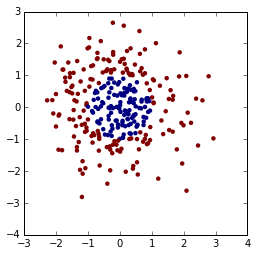

In [39]:
x = np.random.randn(300,2)
y = 2*np.array([float(np.dot(i,i) > 1) for i in x]) - 1
y.shape = (y.shape[0],1)
plt.scatter(x[:,0], x[:,1], c=y, linewidths=0)
plt.axes().set_aspect('equal')

In [40]:
net = buildNetwork(2, 20, 1, bias=True)
ds = SupervisedDataSet(2,1)
ds.setField('input', x)
ds.setField('target', y)

### Entrenamiento

In [41]:
trainer = BackpropTrainer(net, ds)
err_info = trainer.trainEpochs(100)

### Resultados

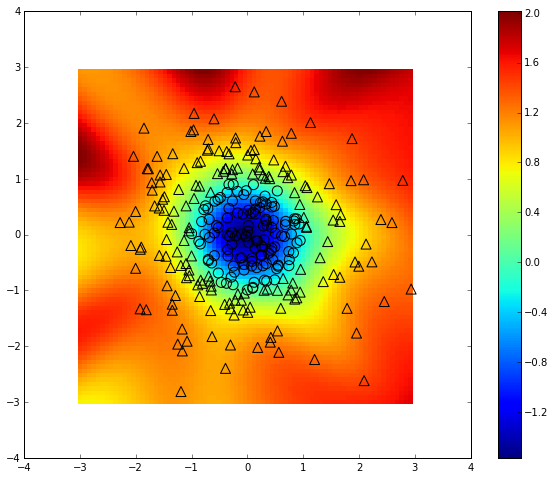

In [83]:
ticks = np.arange(-3,3,0.08)
X, Y = np.meshgrid(ticks, ticks)
# need column vectors in dataset, not arrays
griddata = ClassificationDataSet(2,1, nb_classes=3)
for i in xrange(X.size):
    griddata.addSample([X.ravel()[i],Y.ravel()[i]], [0])
griddata._convertToOneOfMany()  # this is still needed to make the fnn feel comfy

out = net.activateOnDataset(griddata)
out = out.reshape((out.shape[0],))
x = X.flatten()
y = Y.flatten()
h = {1:'^', -1:'o'}
m = [h[i] for i in ds['target'].flatten()]

fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, c=out, linewidths=0, marker=u',')
plt.colorbar()
for i in range(len(ds['input'])):
    plt.scatter(ds['input'][i,0], ds['input'][i,1], s=100, marker=m[i], facecolors='none')